In [14]:
import numpy as np
from Bio.Align import substitution_matrices as sm
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
from Bio import SeqIO
from matplotlib import pyplot as plt
from Bio import pairwise2
import cv2

# Задание 1

In [2]:
def calc_dp(a, b, S, d=-1):
    n, m = len(a)+1, len(b)+1
    f = np.zeros(shape=(n, m))
    f[0] = np.arange(m) * d
    f[:, 0] = np.arange(n) * d
    for i in range(1, n):
        for j in range(1, m):
            f[i, j] = max(f[i-1, j] + d, f[i, j-1] + d, f[i-1, j-1] + (1 if a[i-1] == b[j-1] else -1))
    return f


def calc_path(f, a, b, d=-1):
    n, m = len(a), len(b)
    
    def rec(i, j, state_a, state_b):
        if i == 0 and j == 0:
            yield state_a[::-1], state_b[::-1]
        if i > 0 and j > 0 and f[i, j] == f[i-1, j-1] + (1 if a[i-1] == b[j-1] else -1):
            yield from rec(i-1, j-1, state_a + a[i-1], state_b + b[j-1])
        if i > 0 and f[i, j] == f[i-1, j] + d:
            yield from rec(i-1, j, state_a + a[i-1], state_b + '-')
        if j > 0 and f[i, j] == f[i, j-1] + d:
            yield from rec(i, j-1, state_a + '-', state_b + b[j-1])
    
    return rec(n, m, '', '')

In [3]:
NUM_RESULTS_TO_PRINT = 5

a = 'CAGCACTTGGATTCCCCGG'
b = 'CAGGGGCGTGG'
f = calc_dp(a, b, None)
for i, p in enumerate(calc_path(f, a, b)):
    if i == NUM_RESULTS_TO_PRINT:
        break
    print(p)

('CAGCACTTGGATTCCCCGG', 'CAG-----GG---GCGTGG')
('CAGCACTTGGATTCCCCGG', 'CAG-----GG--G-CGTGG')
('CAGCACTTGGATTCCCCGG', 'CAG-----GG-G--CGTGG')
('CAGCACTTGGATTCCCCGG', 'CAG-----GGG---CGTGG')
('CAGCACTTGGATTCCCCGG', 'CAG----GGG----CGTGG')


In [4]:
f[-1, -1]

-3.0

# Задание 2

In [5]:
records = [
    'ACTCATGG',
    'AAGCACGG',
    'AAGCAAGG',
    'AATCAGGG',
    'AAGTATGG',
    'AAGCAGGG',
    'TCTCACGG',
    'CCTCGTGG',
    'CCGTATGG',
    'ACTCGTCG'
]

records = [
    SeqRecord(Seq(record), id=str(i))
    for i, record in enumerate(records)
]

align = MultipleSeqAlignment(records, annotations={"tool": "demo"})
align.sort()
print(align)

Alignment with 10 rows and 8 columns
ACTCATGG 0
AAGCACGG 1
AAGCAAGG 2
AATCAGGG 3
AAGTATGG 4
AAGCAGGG 5
TCTCACGG 6
CCTCGTGG 7
CCGTATGG 8
ACTCGTCG 9


# Задание 3

In [6]:
# SeqIO.convert('cl.fq', 'fastq', 'cl.fasta', 'fasta')

# Задание 4

In [7]:
'5\'-' + str(Seq('GGATCGTTTAGCCTA').reverse_complement()) + '-3\''

"5'-TAGGCTAAACGATCC-3'"

# Задание 5

In [8]:
def add_plot(seq1, seq2, k=1):
    n, m = len(seq1), len(seq2)
    matrix = np.flip([
        [np.sum(np.array(list(seq1[i:i+k])) == np.array(list(seq2[j:j+k])))
        for j in range(len(seq2) - k + 1)]
        for i in range(len(seq1) - k + 1)
    ], axis=0)

    plt.imshow(matrix)
    plt.colorbar()
    plt.xticks(np.arange(m), seq2)
    plt.yticks(np.arange(n), reversed(seq1))
    plt.plot()

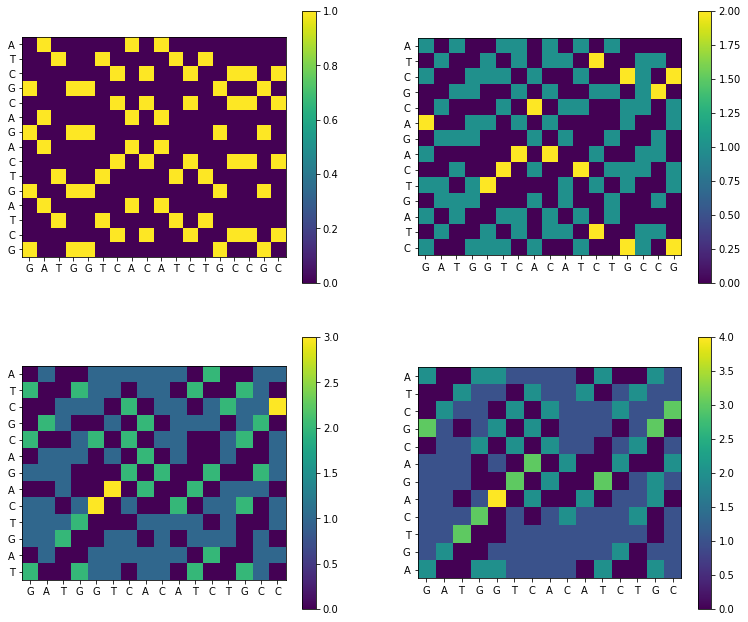

In [9]:
plt.figure(figsize=(13, 11))
for k in range(1, 5):
    plt.subplot(2, 2, k)
    add_plot('GCTAGTCAGACGCTA', 'GATGGTCACATCTGCCGC', k)

# Задание 6

### В первом гэпы короткие и их больше, а во втором ровно иначе. В первом выравнивании штраф больше.

# Задание 13

In [10]:
def calc_path_2(f, a, b, d=-1):
    n, m = len(a), len(b)
    
    def rec(i, j, state_a, state_b):
        print(i, j)
        if i == 0 and j == 0:
            yield state_a[::-1], state_b[::-1]
        if i > 0 and j > 0 and f[i, j] == f[i-1, j-1] + (1 if a[i-1] == b[j-1] else -1):
            yield from rec(i-1, j-1, state_a + a[i-1], state_b + b[j-1])
        if i > 0 and f[i, j] == f[i-1, j] + d:
            yield from rec(i-1, j, state_a + a[i-1], state_b + '-')
        if j > 0 and f[i, j] == f[i, j-1] + d:
            yield from rec(i, j-1, state_a + '-', state_b + b[j-1])
    
    return rec(n, m, '', '')


NUM_RESULTS_TO_PRINT = 1

a = 'AACGTTAC'
b = 'CGATAAC'
f = calc_dp(a, b, None)
for i, p in enumerate(calc_path_2(f, a, b)):
    if i == NUM_RESULTS_TO_PRINT:
        break

8 7
7 6
6 5
5 4
4 3
4 2
3 1
2 0
1 0
0 0
6 4
5 3
4 2
3 1
2 0
1 0
0 0


In [11]:
for item in pairwise2.align.localxx("AACGTTAC", "CGATAAC"):
    print(pairwise2.format_alignment(*item, full_sequences=True))

AACGT-TA-C
  ||  || |
--CG-ATAAC
  Score=5

AACGTTA-C
  ||.|| |
--CGATAAC
  Score=5

AACG-TTA-C
  || | | |
--CGAT-AAC
  Score=5

AACGT-T-AC
  ||  | ||
--CG-ATAAC
  Score=5

AACGTT-AC
  ||.| ||
--CGATAAC
  Score=5

AACG-TT-AC
  || |  ||
--CGAT-AAC
  Score=5

AACG-TTAC
  || |.||
--CGATAAC
  Score=5



# Задание 14

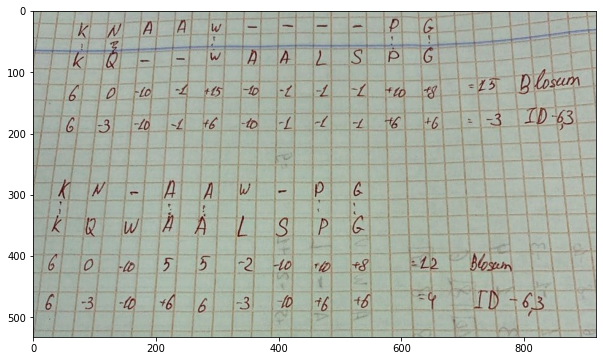

In [12]:
plt.figure(figsize=(15, 6))
plt.imshow(cv2.imread('1.jpg'))
plt.show()

# Задание 7

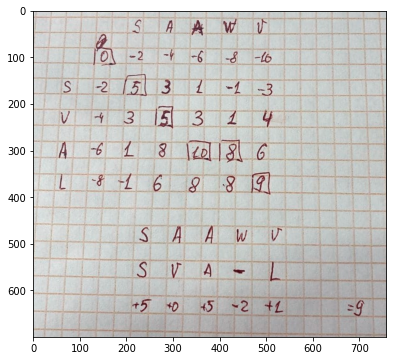

In [13]:
plt.figure(figsize=(15, 6))
plt.imshow(cv2.imread('2.jpg'))
plt.show()